

# Project: Investigate a Dataset (imdb movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database, it has missing values, columns seperated with |. It shows movie title, revenue, budget, genres ...ect


In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Question to be answered ? 

#1 what is the most released genres during summer ?
#2 does the movies with the higher budget/revenue gets higher ratings?


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()
#to be dropped ['homepage','id','imdb_id', 'vote_count','tagline', 'director','overview','keywords','cast','runtime','production_companies']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
# Check for number of duplicated tuples 
df_movies.duplicated().sum()

1

In [31]:
#Check for number of null values 
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [32]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Drop Duplicate, null and unnecessary columns!)

In [33]:
#drop duplicated values
df_movies.drop_duplicates(inplace=True)

In [34]:
#check if the duplicated tuples were deleted 
df_movies.duplicated().sum()

0

In [35]:
#drop unneeded columns ['homepage', 'release_date', 'vote_count','tag line', 'director','overview','keywords'] that won't help in my analysis
df_movies=df_movies.drop(['homepage','id','imdb_id', 'vote_count','tagline', 'director','overview','keywords','cast','runtime','production_companies'], axis=1)

In [36]:
df_movies.head(1)

,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [37]:
#drop null values from genres since its only 23 values
df_movies.dropna(subset=['genres'], inplace=True)

In [38]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
genres            10842 non-null object
release_date      10842 non-null object
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.7+ KB


In [39]:
#transfer date column type from string to datetime type 
df_movies['release_date']= pd.to_datetime(df_movies['release_date'])

In [40]:
df_movies.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [41]:
df_movies.head(1)

,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the most popular genres released during summer ?)

#1)First collect movies that were release in summer ( June, July, August)
#2)Split genres values to look for the genere released the most in summer

In [42]:
#Movies released in summer
df_movies['month']=df_movies['release_date'].dt.month
df_movies.groupby('month')
df_summer=df_movies.loc[df_movies['month'].isin([6,7,8])]
df_summer.head()


,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,6
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2015-06-23,5.8,2015,1.425999e+08,4.053551e+08,6
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,2015-06-17,6.5,2015,6.807997e+07,1.064192e+09,6
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,2015-06-09,8.0,2015,1.609999e+08,7.854116e+08,6
13,5.984995,88000000,243637091,Pixels,Action|Comedy|Science Fiction,2015-07-16,5.8,2015,8.095996e+07,2.241460e+08,7


In [44]:
#new dataframe with splitted genres
genres_df=pd.Series(df_summer['genres']).str.get_dummies(sep='|')

In [45]:
genres_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
all_data = pd.merge(df_summer, genres_df, right_index = True , left_index = True)
all_data.head()

,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,...,0,0,0,0,0,1,0,1,0,0
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2015-06-23,5.8,2015,1.425999e+08,4.053551e+08,...,0,0,0,0,0,1,0,1,0,0
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,2015-06-17,6.5,2015,6.807997e+07,1.064192e+09,...,0,0,0,0,0,0,0,0,0,0
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,2015-06-09,8.0,2015,1.609999e+08,7.854116e+08,...,0,0,0,0,0,0,0,0,0,0
13,5.984995,88000000,243637091,Pixels,Action|Comedy|Science Fiction,2015-07-16,5.8,2015,8.095996e+07,2.241460e+08,...,0,0,0,0,0,1,0,0,0,0


In [47]:
#summation of each genre 
sum_genres=genres_df.sum(axis=0)
sum_genres
#retrieve the most released genre in summer
popular_genre = pd.Series.idxmax(sum_genres)
popular_genre

'Comedy'

In [48]:
sum_genres

Action             640
Adventure          416
Animation          169
Comedy             989
Crime              311
Documentary        110
Drama              968
Family             347
Fantasy            231
Foreign             40
History             54
Horror             397
Music              117
Mystery            176
Romance            390
Science Fiction    348
TV Movie            33
Thriller           687
War                 48
Western             45
dtype: int64

In [49]:
#most popular genres in summer
sum_genres.nlargest(5)
labels=sum_genres.index
labels

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

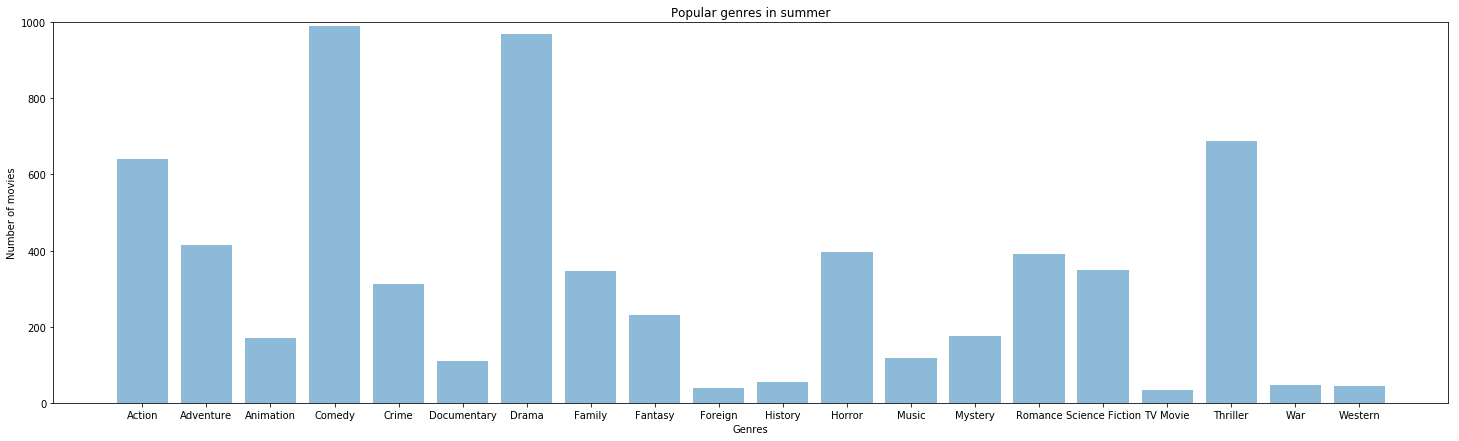

In [51]:
#plot number of movies for each genres
pos = np.arange(len(labels))
plt.bar(pos , sum_genres, align='center', alpha=0.5)
 
# Add title and axis names
plt.title('Popular genres in summer')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
 
# Limits for the Y axis
plt.ylim(0,1000)
 
# Create names
plt.xticks(pos, labels)
#change size of plot
plt.rcParams['figure.figsize'] = [25,7]
# Show graphic
plt.show()

### Research Question 2  : does the movies with the higher budget/revenue gets higher ratings?

In [52]:
#drop unnecessary columns
df_movies.head(1)
df_budget = df_movies.drop(['month','revenue_adj','original_title','release_date','genres','budget_adj','release_year','popularity'], axis=1)
df_budget.head(1)

,budget,revenue,vote_average
0,150000000,1513528810,6.5


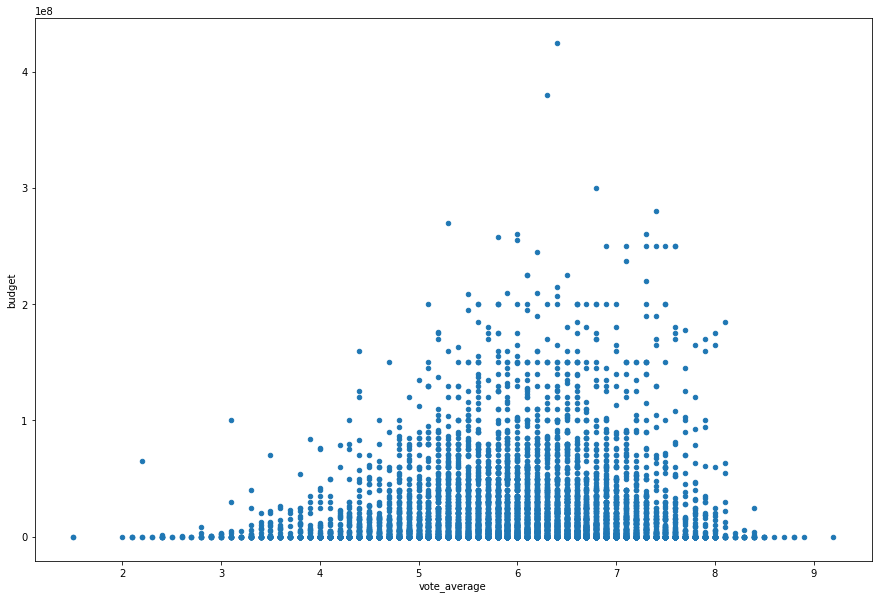

In [53]:
#plot vote_average and budget 
df_budget.plot(x='vote_average', y='budget', kind='scatter', figsize=(15,10));


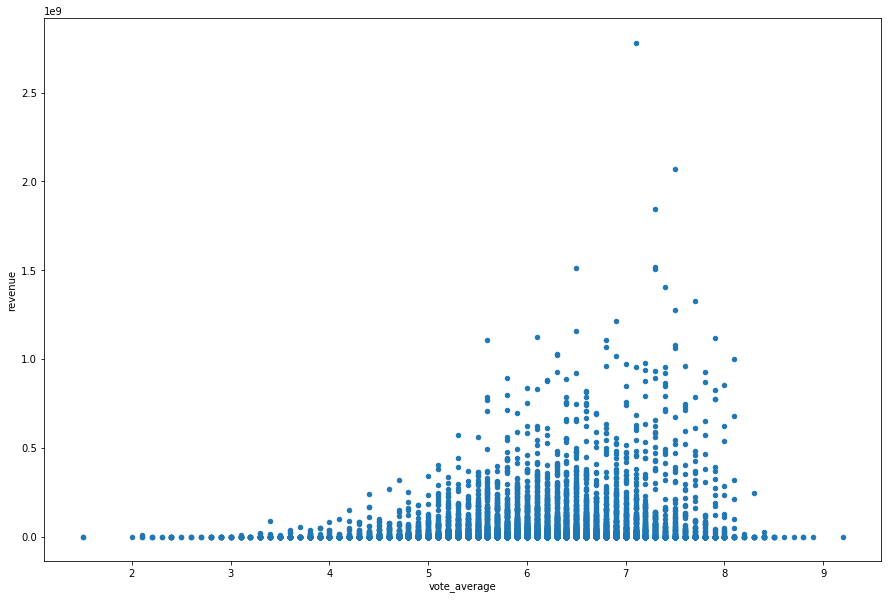

In [54]:
#plot vote average and revenue
df_budget.plot(x='vote_average', y='revenue', kind='scatter', figsize=(15,10));


<a id='conclusions'></a>
## Conclusions


### to conclude the results of my two questions:

    1> The most released genre in summer would be comedy 
    * a better way to approach this is to look for each genre popularity and see what is the most popular genre *
    2> Comedy, drama and thriller are the most released genres 
    3> Movies with budget lower than 0.5 tend to get rating less than 4 
    4> Movies with 5 to 8 rating usually gets arround 0.5 revenue

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0